#### ASSIGNMENT
#### In this assignment, you will continue to study the data of the US Education System (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

#### To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

#### 1- Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('data/StudentsPerformance.csv',  low_memory=False)

In [145]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


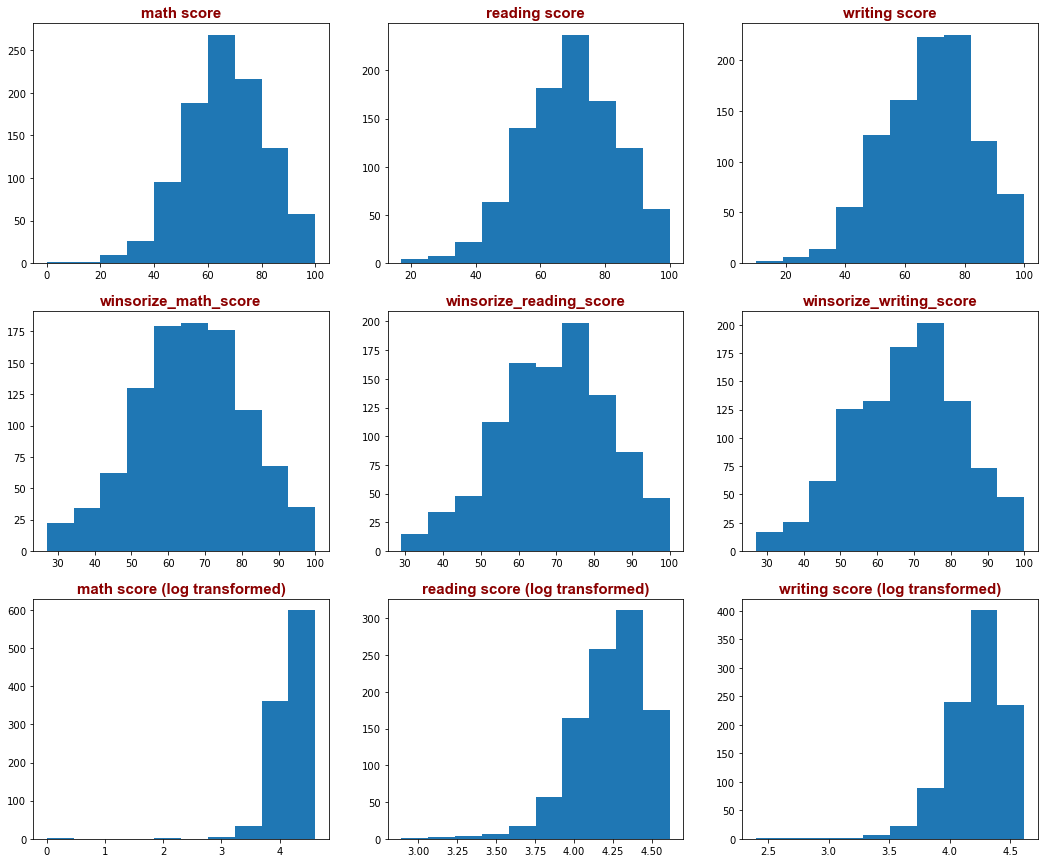

In [146]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }

df["winsorize_math_score"] = winsorize(df["math score"], (0.008 , 0))
df["winsorize_reading_score"] = winsorize(df["reading score"], (0.006, 0))
df["winsorize_writing_score"] = winsorize(df["writing score"], (0.005, 0))
pd.options.display.float_format = '{:.3f}'.format



plt.figure(figsize=(18,15))




variables = ['math score','reading score','writing score']
winsorize_variables= ['winsorize_math_score', 'winsorize_reading_score', 'winsorize_writing_score']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[variables[i]].values+1))
    plt.title(variables[i]+' (log transformed)', fontdict=title_font)

#### 2- We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.
 


In [147]:
df['averagescore']=(df['math score']+df['reading score']+df['writing score'])/3

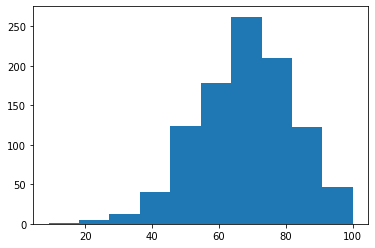

In [148]:
plt.hist(df['averagescore'])
df["winsorize_averagescore"] = winsorize(df["averagescore"], (0.008 , 0))

plt.show()


#### 3- Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?
 


In [149]:
df.head()
df2=df

In [150]:
#df =df.replace({'gender': {'female': 0, 'male': 1}})


In [151]:
#df =df.replace({'race/ethnicity': {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}})


In [152]:
#df =df.replace({'parental level of education': {"bachelor's degree": 0, 'some college': 1, "master's degree": 2, "associate's degree": 3, 'high school': 4, 'some high school': 5}})


In [153]:
#df =df.replace({'lunch': {"standard": 0, 'free/reduced': 1}})


In [154]:
#df =df.replace({'test preparation course': {"none": 0, 'completed': 1}})


In [155]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score,averagescore,winsorize_averagescore
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,72.667,72.667
1,female,group C,some college,standard,completed,69,90,88,69,90,88,82.333,82.333
2,female,group B,master's degree,standard,none,90,95,93,90,95,93,92.667,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,49.333,49.333
4,male,group C,some college,standard,none,76,78,75,76,78,75,76.333,76.333


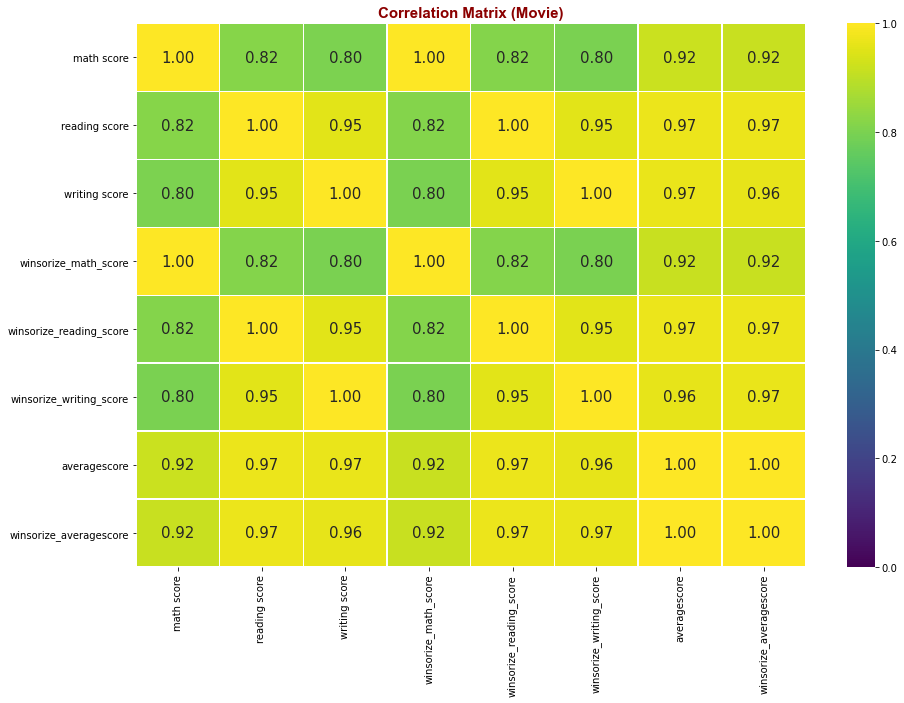

In [156]:
plt.figure(figsize=(15,10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)", fontdict=title_font)

plt.show()

In [159]:
def scorefilter(score):
    if score>85: return "perfect"
    elif score>70: return "good"
    elif score>50: return "normal"
    else: return "bad"

In [160]:
df["score_category"]=df.winsorize_averagescore.apply(scorefilter)

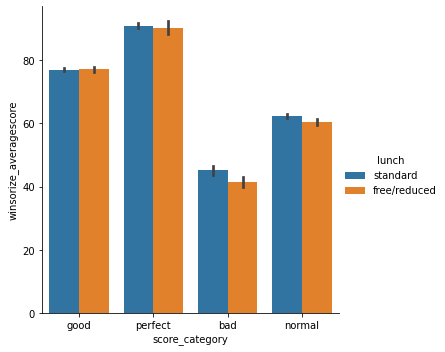

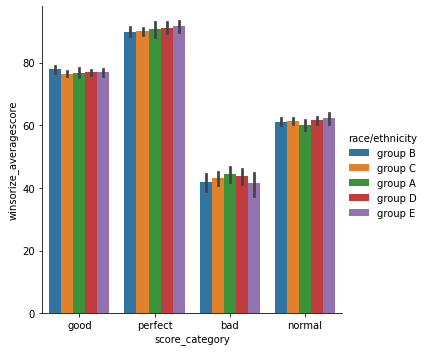

In [198]:

a=sns.catplot(x="score_category", y="winsorize_averagescore", hue="lunch", kind="bar",  data=df, ax=axes[0, 0])
b=sns.catplot(x="score_category", y="winsorize_averagescore", hue="race/ethnicity", kind="bar", data=df,ax=axes[0, 1])


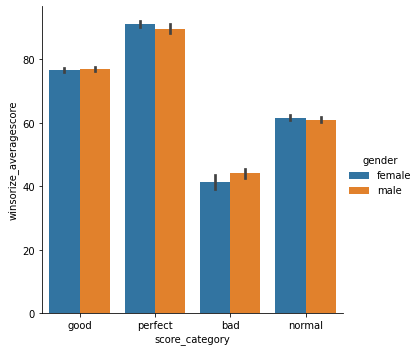

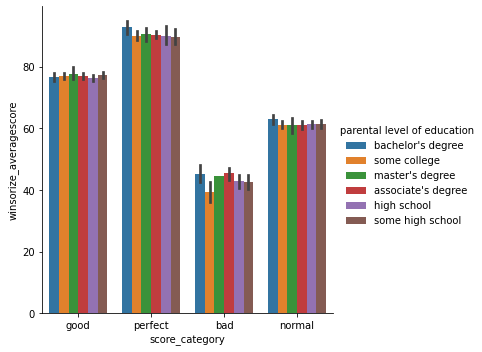

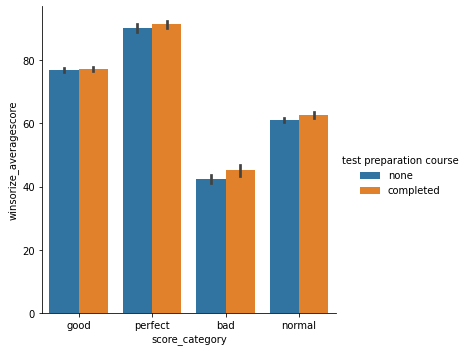

In [200]:
c=sns.catplot(x="score_category", y="winsorize_averagescore", hue="gender", kind="bar", data=df,ax=axes[1, 0])
d=sns.catplot(x="score_category", y="winsorize_averagescore", hue="parental level of education", kind="bar", data=df,ax=axes[1, 1])
e=d=sns.catplot(x="score_category", y="winsorize_averagescore", hue="test preparation course", kind="bar", data=df,ax=axes[1, 1])



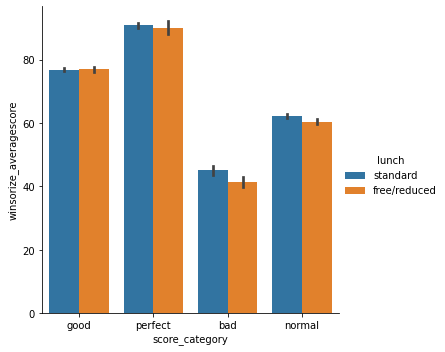


#### 4- Does the test preparation course have an impact on the target variable you created?